# Imports

In [455]:
import sklearn as skl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm
import datetime
%matplotlib inline


---
# Compreensão do Âmbito do Dataset

O Dataset de teino é constituido por 18835 casos e pelos seguintes atributos:

* **song name:** nome da música
* **song_popularity:** valores entre 0 e 100
* **song_duration_ms:** duração da música em milisegundos; tipicamente valores entre 200k e 300k
* **acousticness:** valores entre 0 e 1
* **danceability:** valores entre 0 e 1
* **energy:** valores entre 0 e 1
* **instrumentalness:** valores entre 0 e 1
* **key:** todas as chaves em oitava codificadas como valores entre 0 e 11, começando com C como 0, C como 1, etc.
* **liveness:** valores entre 0 e 1
* **loudness:** float com valores tipicamente entre -60 e 0
* **audio_mode:** 0 = menor, 1 = maior
* **speechiness:** valores entre 0 e 1
* **tempo:** float com valores tipicamente entre 50 e 150
* **audio_valence:** quão felizes a feliz a música é; valores entre 0 e 1
* **time-signature:** valores entre 1 e 5

---
# Compreensão dos Dados

In [456]:
# Get the data 
song_df = pd.read_csv('song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [457]:
song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [458]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [459]:
# Check missing values
song_df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [460]:
# Check unique values
song_df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [461]:
# Check how many songs are duplicated
song_df.duplicated().sum()

3909

In [462]:
# Check Min and max values for each column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

song_df.apply(minMax)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
min,"""40"" - Live Version 1983",0,12000,0.000001,0.000,0.00107,0.000,0,0.0109,-38.768,0,0.000,0.000,0,0.000
max,피 땀 눈물,100,1799346,0.996000,0.987,0.99900,0.997,11,0.9860,1.585,1,0.941,242.318,5,0.984


In [463]:
# Binning para verificação do balanceamento dos dados

# Define the bin edges and labels
bin_edges = [0, 25, 50, 75, 100]
bin_labels = ['low', 'medium', 'high','very high']

# Create bins using the "cut" function and assign labels
#song_df['song_popularity_bins'] = pd.cut(song_df['song_popularity'], bin_edges, labels=bin_labels)

# Print the resulting dataframe
print(song_df)


                        song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.0000

In [464]:
# Count the number of observations in each bin
bin_counts = song_df['song_popularity_bins'].value_counts()

# Print the bin counts
print(bin_counts)


high         8685
medium       5191
very high    2577
low          2110
Name: song_popularity_bins, dtype: int64


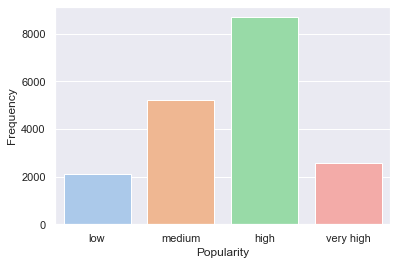

In [465]:
# Create a countplot of the binned variable
sns.countplot(x="song_popularity_bins", data=song_df)

# Add labels and show the plot
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


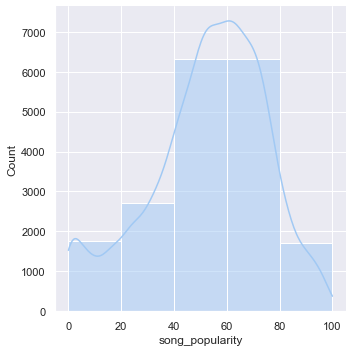

In [466]:
# Create a distplot of the binned variable
sns.displot(song_df, x='song_popularity', bins=5, kde=True, stat='count')


### Visualização dos dados

<AxesSubplot:>

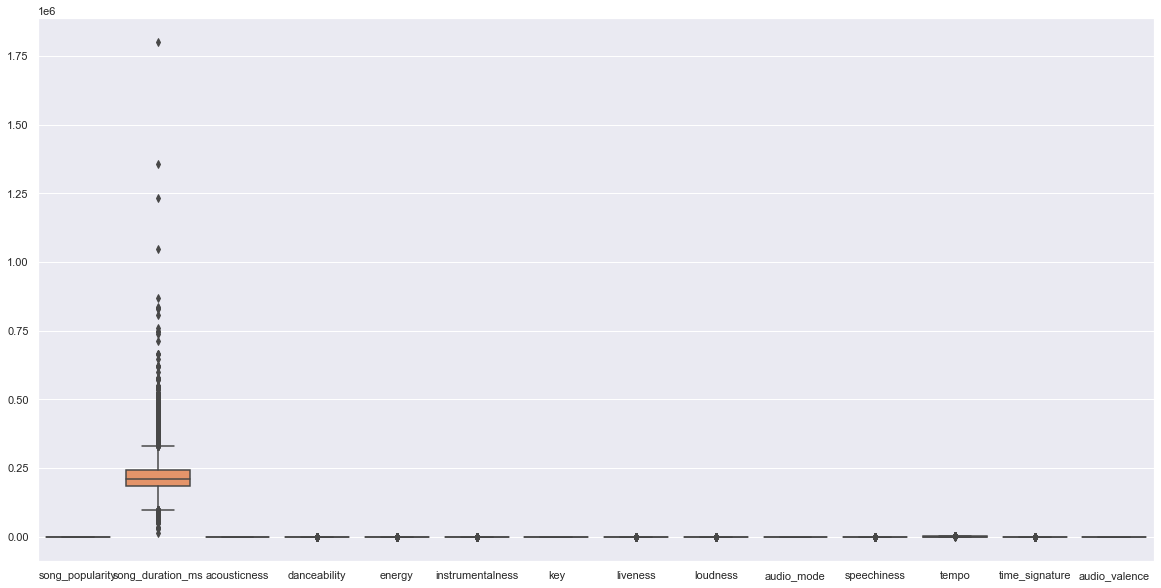

In [467]:
# Outliers boxplot
sns.set_theme(palette="pastel")
plt.subplots(figsize=(20,10))
sns.boxplot(data=song_df)

<AxesSubplot:>

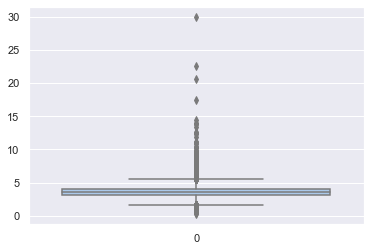

In [468]:
# Outliers em minutos
sns.boxplot(data=song_df['song_duration_ms'].apply(lambda x: x/60000))

<AxesSubplot:>

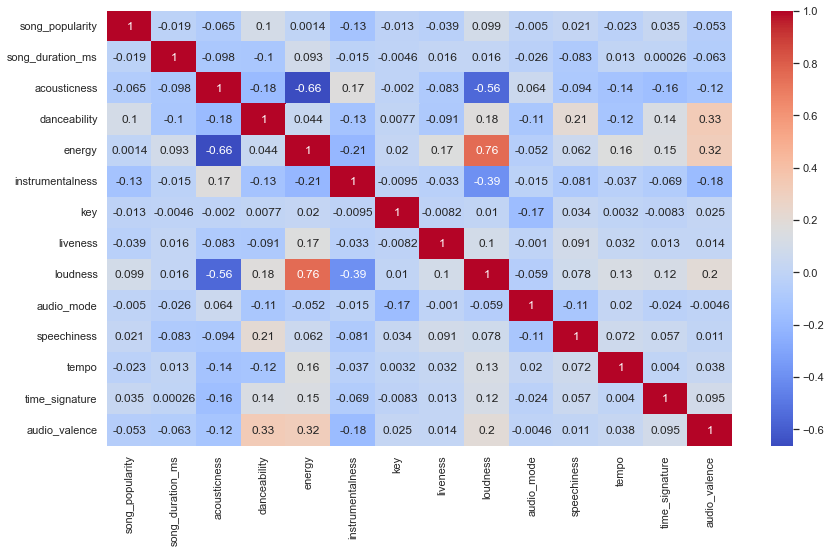

In [469]:
# Matriz de Correlação
plt.subplots(figsize=(14,8))
sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')

---
# Preparação dos Dados


### Remove duplicates and song name

In [470]:
# Remove duplicates
song_df = song_df.drop_duplicates()

# Remove music name (unique id)
song_df = song_df.drop(['song_name'], axis=1)


### One Hot Encoding

In [471]:
# One Hot Encoding
for i in song_df.columns:
    if song_df[i].nunique() == 2:
        song_df[i] = pd.get_dummies(song_df[i], drop_first=True, prefix=i)
    elif song_df[i].nunique() > 2 and song_df[i].nunique() < 16:
        song_df = pd.concat([song_df, pd.get_dummies(song_df[i], prefix=i)], axis=1)
        song_df = song_df.drop([i], axis=1)

song_df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,song_popularity_bins_low,song_popularity_bins_medium,song_popularity_bins_high,song_popularity_bins_very high
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,0,0,1,0,0,0,1,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,0,0,0,1,0,0,0,1,0
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,...,0,0,0,0,1,0,0,0,0,1
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,1,0,0,0,1,0
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,1,0,0,0,1,0


### Remove Outliers

In [472]:
# Remove outliers
for i in song_df.columns:
    if(song_df[i].nunique() >= 16): #Não categoricos
        mean=song_df[i].mean()

        skewness=song_df[i].skew()

        if(skewness > 0.5 or skewness < -0.5): #Distriuido normalmente
            upper=song_df[i].mean() + 3*song_df[i].std()
            lower=song_df[i].mean() - 3*song_df[i].std()

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 
        else: #Distribuido não normalmente (Skewed)
            q1 = song_df[i].quantile(0.25)
            q3 = song_df[i].quantile(0.75)
            iqr = q3 - q1
            upper = q3 + 1.5*iqr
            lower = q1 - 1.5*iqr

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 

### Normalization

In [473]:
# Data normalization
for i in song_df.columns:
        max_value = song_df[i].max()
        min_value = song_df[i].min()
        song_df[i] = (song_df[i] - min_value) / (max_value - min_value)

song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,song_popularity_bins_low,song_popularity_bins_medium,song_popularity_bins_high,song_popularity_bins_very high
count,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,...,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000
mean,0.492324,0.449294,0.250052,0.547854,0.645850,0.047807,0.254542,0.536646,0.635190,0.179784,...,0.082219,0.000077,0.003555,0.039719,0.946063,0.010587,0.130747,0.318213,0.464106,0.072406
std,0.205665,0.140494,0.278718,0.192508,0.210977,0.162064,0.185186,0.161531,0.481395,0.220525,...,0.274709,0.008791,0.059517,0.195305,0.225902,0.102349,0.337137,0.465801,0.498729,0.259168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.358749,0.022990,0.421255,0.500940,0.000000,0.131991,0.443858,0.000000,0.037181,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.520000,0.434844,0.129516,0.558259,0.671121,0.000014,0.180003,0.568026,1.000000,0.081123,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.640000,0.524755,0.413653,0.688860,0.816246,0.001821,0.331793,0.654889,1.000000,0.222569,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [474]:
# Variables for training 
X = song_df.drop(["song_popularity"],axis=1) 
y = song_df["song_popularity"]

In [475]:
# Avaliação do desempenho do modelo com regressão linear múltipla utilizando a classe OLS - Ordinary Least Squares
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

sm_model = sm.OLS(y,X).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     3493.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:06:59   Log-Likelihood:                 16406.
No. Observations:               12941   AIC:                        -3.275e+04
Df Residuals:                   12910   BIC:                        -3.252e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
song_duratio

---  
# Modelling - Supervised Learning

---
# Multiple Linear Regression

In [476]:
from sklearn import linear_model

# Initialize model
multi_reg_model =  linear_model.LinearRegression()

# Train the model using the song_df data
multi_reg_model.fit(X_train,y_train)

y_pred = multi_reg_model.predict(X_test)
y_pred

# Check R-squared
print("Multiple Linear Regression R-squared:",multi_reg_model.score(X,y))


Multiple Linear Regression R-squared: 0.8895623325659148


## Model evaluation

In [477]:
from sklearn.metrics import r2_score

rmse = float(format(np.sqrt(mean_squared_error(y_test,y_pred)), '.3f'))
print("RMSE: ", rmse)

mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)

r2 = r2_score(y_test,y_pred)
print("R-squared: ", r2)


RMSE:  0.068
MSE:  0.004668059631638953
R-squared:  0.8892905502337116


## Results visualisation

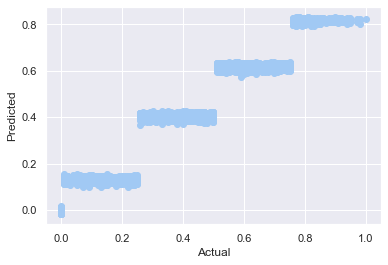

In [478]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

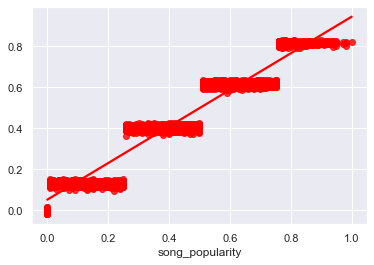

In [479]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

---
# Decision Tree Regression

In [511]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.6, random_state = 42)

# create the decision tree model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=9, min_samples_split=2, random_state=0)

# train the model on the training data
dt_regressor.fit(X_train_dt, y_train_dt)

# make predictions on the test data
y_pred_dt = dt_regressor.predict(X_test_dt)

# evaluate the model using the mean squared error metric
mse = mean_squared_error(y_test_dt, y_pred_dt)

# print the mean squared error
print("Mean Squared Error: ", mse)


Mean Squared Error:  0.004695953806487518


## Pruning 

In [510]:
from sklearn.model_selection import validation_curve

# Define the parameter range 
param_range_max_depth = range(1, 15)
param_range_min_samples_leaf = range(1,10)
param_range_min_samples_split = range(2,10)

# Compute the train and test scores
train_scores, test_scores = validation_curve(dt_regressor, X_train_dt, y_train_dt, param_name="max_depth", param_range=param_range, cv=5, scoring="neg_mean_squared_error")

# Compute the train and test scores for max_depth
train_scores_max_depth, test_scores_max_depth = validation_curve(dt_regressor, X_train_dt, y_train_dt, param_name="max_depth", param_range=param_range_max_depth, cv=5, scoring="neg_mean_squared_error")

# Compute the train and test scores for min_samples_leaf
train_scores_min_samples_leaf, test_scores_min_samples_leaf = validation_curve(dt_regressor, X_train_dt, y_train_dt, param_name="min_samples_leaf", param_range=param_range_min_samples_leaf, cv=5, scoring="neg_mean_squared_error")

# Compute the train and test scores for min_samples_split
train_scores_min_samples_split, test_scores_min_samples_split = validation_curve(dt_regressor, X_train_dt, y_train_dt, param_name="min_samples_split", param_range=param_range_min_samples_split, cv=5, scoring="neg_mean_squared_error")

# Find the optimal max_depth, min_samples_leaf, min_samples_split
optimal_max_depth = param_range_max_depth[np.argmax(np.mean(test_scores_max_depth, axis=1))]
optimal_min_samples_leaf = param_range_min_samples_leaf[np.argmax(np.mean(test_scores_min_samples_leaf, axis=1))]
optimal_min_samples_split = param_range_min_samples_split[np.argmax(np.mean(test_scores_min_samples_split, axis=1))]

# Create the final model with the optimal max_depth, min_samples_leaf, min_samples_split
final_model = DecisionTreeRegressor(max_depth=optimal_max_depth, min_samples_leaf=optimal_min_samples_leaf, min_samples_split=optimal_min_samples_split,random_state=0)
final_model.fit(X, y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9, random_state=0)

## Model evaluation

In [512]:
from sklearn.metrics import mean_squared_error

# Predicting the target values of the test set
y_pred_dt = dt_regressor.predict(X_test_dt)

# RMSE (Root Mean Squared Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_dt, y_pred_dt)), '.3f'))
print("RMSE: ", rmse)

mse = mean_squared_error(y_test_dt, y_pred_dt)
print("MSE: ", mse)

r2 = r2_score(y_test_dt, y_pred_dt)
print("R-squared: ", r2)

RMSE:  0.069
MSE:  0.004695953806487518
R-squared:  0.8888496408793851


## Results visualisation

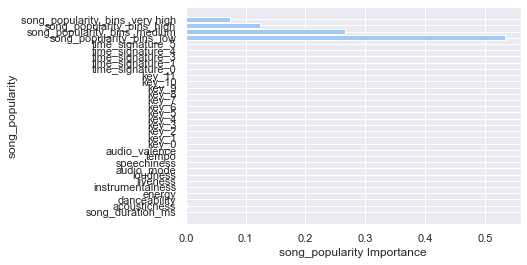

In [513]:
# get the feature importances
importances = dt_regressor.feature_importances_

# plot the feature importances
plt.barh(X.columns, importances)
plt.xlabel("song_popularity Importance")
plt.ylabel("song_popularity")
plt.show()

---
# Random Forest Regression

In [514]:
#Import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.2, random_state = 28)

# Create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 10, min_samples_leaf=1, min_samples_split=2, max_features=20, random_state = 0)

# Fit the Random Forest Regression to the dataset
rf_regressor.fit(X_train_rf,y_train_rf)


RandomForestRegressor(max_features=20, n_estimators=10, random_state=0)

## Model evaluation

In [484]:

# Predicting the target values of the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)), '.3f'))
print("RMSE: ", rmse)

mse = mean_squared_error(y_test_rf, y_pred_rf)
print("MSE: ", mse)

r2 = r2_score(y_test_rf, y_pred_rf)
print("R-squared: ", r2)

RMSE:  0.072
MSE:  0.005120971726535342
R-squared:  0.8802544806493682


## Results visualisation

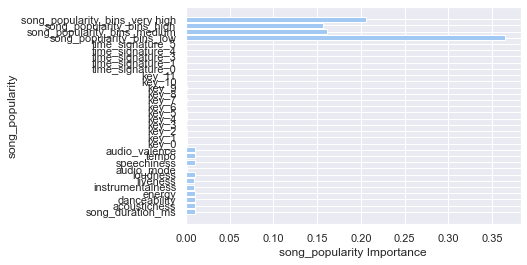

In [485]:
# get the feature importances
importances = rf_regressor.feature_importances_

# plot the feature importances
plt.barh(X.columns, importances)
plt.xlabel("song_popularity Importance")
plt.ylabel("song_popularity")
plt.show()

---
# Support Vector Regression (SVR) 

In [486]:
from sklearn.svm import SVR

# Splitting the dataset into training and testing set
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [503]:
# Initializing the SVR model 
svr_model = SVR(C=0.1,kernel='rbf')

# Fitting the SVR model to the data
svr_model.fit(X_train_svr, y_train_svr.ravel())

SVR(C=0.1)

## Grid Search Cross Validation

In [502]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}

# Create the grid search object
grid_search = GridSearchCV(svr_model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_svr, y_train_svr)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Best score: 0.8816968712689663


## Model evaluation

In [504]:
# Predicting the target values of the test set
y_pred_svr = svr_model.predict(X_test_svr)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_svr, y_pred_svr)), '.3f'))
print("RMSE: ", rmse)

mse = mean_squared_error(y_test_svr, y_pred_svr)
print("MSE: ", mse)

r2 = r2_score(y_test_svr, y_pred_svr)
print("R-squared: ", r2)

RMSE:  0.071
MSE:  0.004986344296292888
R-squared:  0.8834025221567425


## Results visualisation

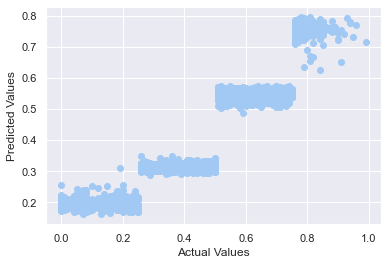

In [489]:
# Create a scatter plot of the predictions vs the actual values
plt.scatter(y_test_svr, y_pred_svr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

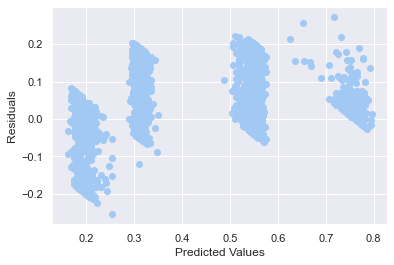

In [490]:
# calculate the residuals
residuals = y_test_svr - y_pred_svr

# create a scatter plot of the residuals
plt.scatter(y_pred_svr, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

---
# Robust Regression (RANSAC)

In [491]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

X_ransac, y_ransac = make_regression(n_samples=12941, n_features=33, noise=15)

ransac = RANSACRegressor(random_state=0)
ransac.fit(X_ransac, y_ransac)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print("Number of inliers: ", sum(inlier_mask))
print("Number of outliers: ", sum(outlier_mask))

y_pred_ransac = ransac.predict(X_ransac)


Number of inliers:  12673
Number of outliers:  268


## Model evaluation

In [492]:
mse = mean_squared_error(y_ransac, y_pred_ransac)
print("MSE: ", mse)

r2 = r2_score(y_ransac, y_pred_ransac)
print("R-squared: ", r2)

MSE:  227.67218679887134
R-squared:  0.9909537114470881


## Cross Validation



In [493]:
scores = cross_val_score(ransac, X_ransac, y_ransac, cv=5)
print("Cross-validation scores: ", scores)
print("Mean score: ", np.mean(scores))

Cross-validation scores:  [0.99099821 0.99110473 0.99112686 0.99048481 0.99079972]
Mean score:  0.9909028655595945


---
# Gaussian Process (GP)

In [515]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

X_train_gp,X_test_gp,y_train_gp,y_test_gp = train_test_split(X,y,test_size=0.6,random_state=0)

# Define the kernel
kernel = 1 * RBF(length_scale=0.5)

# Create the GP model
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the GP model to the data
gp_model.fit(X_train_gp, y_train_gp)

gp_model.kernel_

# Predict on new data
y_pred_gp, sigma = gp_model.predict(X_test_gp, return_std=True)


/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


KeyboardInterrupt: 

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'kernel': [RBF(length_scale=ls) for ls in np.logspace(-2, 2, num=100)]}

# Create the GridSearchCV object
grid_search_gp = GridSearchCV(gp_model, param_grid, cv=10)

# Fit the GridSearchCV object to the data
grid_search_gp.fit(X_train_gp, y_train_gp)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_gp.best_params_)
print("Best score: ", grid_search_gp.best_score_)


/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iter

Best parameters:  {'kernel': RBF(length_scale=0.0278)}
Best score:  -0.007464249255765809


## Model evaluation 

In [ ]:
mse = mean_squared_error(y_test_gp, y_pred_gp)
print("MSE: ", mse)

r2 = r2_score(y_test_gp, y_pred_gp)
print("R-squared: ", r2)

MSE:  46.4713753850798
R-squared:  0.5314553904516028


## End of modelling



---    
# Cross Validation

## K-Fold CV

In [516]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds (entre 5 a 10)
n_folds = 5

# Create the K-fold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True)

# Evaluate model 1
scores_1 = cross_val_score(multi_reg_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Evaluate model 2
scores_2 = cross_val_score(dt_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Evaluate model 3
scores_3 = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Evaluate model 4
scores_4 = cross_val_score(svr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Evaluate model 5
scores_5 = cross_val_score(ransac, X, y, cv=kf, scoring='neg_mean_squared_error')

# Evaluate model 6
scores_6 = cross_val_score(gp_model, X, y, cv=kf, scoring='neg_mean_squared_error')


# Print the average MSE and the standard deviation of the MSE
print("Model MLR: MSE = %0.4f (+/- %0.4f)" % (-scores_1.mean(), scores_1.std()))
print("Model DTR: MSE = %0.4f (+/- %0.4f)" % (-scores_2.mean(), scores_2.std()))
print("Model RFR: MSE = %0.4f (+/- %0.4f)" % (-scores_3.mean(), scores_3.std()))
print("Model SVR: MSE = %0.4f (+/- %0.4f)" % (-scores_4.mean(), scores_4.std()))
print("Model RANSAC: MSE = %0.4f (+/- %0.4f)" % (-scores_5.mean(), scores_5.std()))
print("Model GP: MSE = %0.4f (+/- %0.4f)" % (-scores_6.mean(), scores_6.std()))